# Download the dataset from Kaggle

In [91]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil




CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2637%2F4381%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240519%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240519T012708Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da788ab19928e2bb407c5162bff9aa8dc18d0927673fc78dca2364225418a86735e6c72c1e933a297d428a63782fc7a0ef3b91a16ff97eb47f6f41331e1056c23501247f06ea19359937218f4e8efe5f2e53ccd7865aa1ac12fe779d5bd59228dad041d3c914758c82fd87805464f921967415939f15a0f32947e78aa5bcd7f60420f8d229178f68cd2160717b5633d8f83bb9122434f85a424d9723a1bfca6733df228c97633a9fb399bf02928c726b9d03a6dc5bf15208be3e26c149b9c8febe0fec1c4383e04d72d545dbd5f4cca6829dd651ad44dd33e37974151fb9d1636fdccc1ca8bf4ceca6995b86f391ff38df423567c1b70178fab518405e60db1e0'

KAGGLE_INPUT_PATH='../kaggle/input'
KAGGLE_WORKING_PATH='../kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('../kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 25621004 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


## Import packages

In [92]:
## Part 0:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Part 1: Data Wraggling package
import re
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

## Part 2: Text Vectorization Using Python: Word2Vec, GloVe, and **BERT**
# pip install transformers
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA

import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

## Part 3: Visualize PC
# pip install matplotlib seaborn
import seaborn as sns

## Part 4: Classification using pc1 and pc2


[nltk_data] Downloading package wordnet to /home/hb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

There is 1 csv file in the current version of the dataset:


In [93]:
print(os.listdir('../kaggle/input'))

['mbti_1.csv']


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [94]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [95]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [96]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: ../input/mbti_1.csv

In [97]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# mbti_1.csv has 8675 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../kaggle/input/mbti_1.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'mbti_1.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 2 columns


Let's take a quick look at what the data looks like:

In [98]:
df1.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


Distribution graphs (histogram/bar graph) of sampled columns:

In [99]:
def count_words(text):
    # Split the text into words
    words = text.split()
    # Count the number of words
    return len(words)

In [100]:
(df1['posts'].apply(count_words)).mean()

1226.142

In [101]:
df1['posts'][0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [102]:
df1

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
995,ENFP,"As an INTJ, I have been very interested in EST..."
996,ENTP,http://i975.photobucket.com/albums/ae240/Where...
997,INFP,"'Hello, you look lovely...|||A quick recap on ..."
998,ENTJ,'I start every single phone conversation with ...


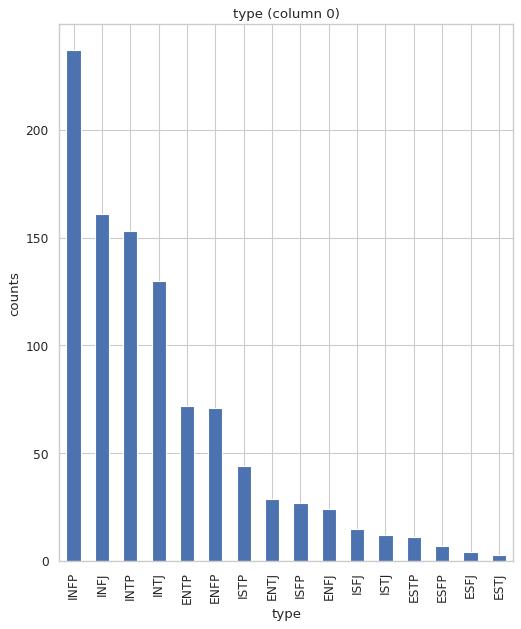

In [103]:
plotPerColumnDistribution(df1, 10, 5)

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Edit Notebook" button at the top of the kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!

# Part 1: Data Wraggling


In [104]:
# prompt: data wrggling the text from dataframe
df = df1

# Select the column containing the text you want to wrangle
text_column = 'posts'

# Convert the text column to lowercase
df[text_column] = df[text_column].str.lower()

# Remove special characters
df[text_column] = df[text_column].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Remove URLs
df[text_column] = df[text_column].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove punctuation from the text column
df[text_column] = df[text_column].str.replace('[^\w\s]', '')

# Remove stop words from the text column
stop_words = ['a', 'an', 'the', 'in', 'on', 'at', 'of', 'to', 'for', 'by', 'with', 'from', 'and']
df[text_column] = df[text_column].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lemmatize the text column using WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
df[text_column] = df[text_column].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))



# Print the wrangled text data
print(df[text_column])


0      intj moment sportscenter not top ten play pran...
1      im finding lack me these post very alarmingsex...
2      good one course which i say i know thats my bl...
3      dear intp i enjoyed our conversation other day...
4      youre firedthats another silly misconception t...
                             ...                        
995    a intj i have been very interested estjs reaso...
996    that wa too irresistible lol rofl rly wtf ppl ...
997    hello you look lovelya quick recap general jou...
998    i start every single phone conversation me hey...
999    lol course clearly your name is mike bill bob ...
Name: posts, Length: 1000, dtype: object


# Part 2: Convert Sentence into Vector Space using BERT

This script processes BERT embeddings by:

- Extracting embeddings for each text sample.
- Applying PCA to reduce the dimensionality of these embeddings, which can help in visualizing or further clustering tasks.
- Calculating semantic distances (using cosine similarity here) between embeddings, which helps in understanding how semantically close or far apart different texts are.

We can adjust the ***number of components*** in PCA or the ***distance metric*** as we need. This script provides a basic framework for handling and analyzing text embeddings from BERT.

## Part 2.1: Extract Embeddings from BERT Output

TODO: word embedding is related to the PCA concept...  
the cosine distance between words shows the semantically dissimiliarity.


To use BERT (Bidirectional Encoder Representations from Transformers) for generating word embeddings, you can utilize the transformers library from Hugging Face. This library provides a straightforward way to access pre-trained BERT models and use them to transform text into embeddings.

In [105]:
# Specify the file path for the DataFrame
max_features = 1000  # This can be ignored or repurposed since max_length is specific to BERT
file_path = 'df_mbti_with_tfidf_embedding.pkl'

if os.path.exists(file_path):
    # Read the DataFrame from the file
    with open(file_path, 'rb') as file:
        tfidf_df = pickle.load(file)
else:
    class Lemmatizer(object):
        def __init__(self):
            self.lemmatizer = WordNetLemmatizer()
        def __call__(self, sentence):
            return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

    # Initialize the TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english',tokenizer=Lemmatizer())  # You can specify max_features to limit dimensionality

    # Fit and transform the posts to get TF-IDF features
    tfidf_matrix = vectorizer.fit_transform(df['posts'])

    # Convert the TF-IDF matrix to a DataFrame and add to df
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # Save the DataFrame into a file for fast access in the future
    with open(file_path, 'wb') as file:
        pickle.dump(tfidf_df, file)

# Now df is ready to use
print(tfidf_df)


           10  100   20   ability      able     about  above  absolutely  \
0    0.000000  0.0  0.0  0.000000  0.000000  0.025398    0.0    0.000000   
1    0.000000  0.0  0.0  0.000000  0.027449  0.026486    0.0    0.000000   
2    0.000000  0.0  0.0  0.095998  0.034440  0.066464    0.0    0.088289   
3    0.000000  0.0  0.0  0.000000  0.058129  0.084134    0.0    0.000000   
4    0.000000  0.0  0.0  0.000000  0.000000  0.030048    0.0    0.000000   
..        ...  ...  ...       ...       ...       ...    ...         ...   
995  0.040255  0.0  0.0  0.000000  0.000000  0.043566    0.0    0.000000   
996  0.000000  0.0  0.0  0.000000  0.000000  0.044910    0.0    0.059658   
997  0.000000  0.0  0.0  0.000000  0.000000  0.054619    0.0    0.000000   
998  0.031504  0.0  0.0  0.000000  0.000000  0.090922    0.0    0.000000   
999  0.000000  0.0  0.0  0.000000  0.000000  0.016586    0.0    0.000000   

       accept  accurate  ...  yet       you  youd     youll     young  \
0    0.000000 

In [106]:
# Convert the TF-IDF DataFrame to a NumPy array
embeddings_array = tfidf_df.to_numpy()

# Print the numpy array
print(embeddings_array)


[[0.         0.         0.         ... 0.03666828 0.         0.06271807]
 [0.         0.         0.         ... 0.07647701 0.02570928 0.        ]
 [0.         0.         0.         ... 0.07196701 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.0788545  0.05301705 0.10115561]
 [0.03150437 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Part 2.2: Apply PCA to Reduce Dimensionality


In [107]:
k = 500

# Convert tensor to numpy array for PCA
embeddings_array = tfidf_df.to_numpy()

# Initialize PCA, here reducing to 100 dimensions for visualization
pca = PCA(n_components=k)
reduced_embeddings = pca.fit_transform(embeddings_array)

# Add reduced dimensions back to DataFrame
df['pca_one'] = reduced_embeddings[:, 0]
df['pca_two'] = reduced_embeddings[:, 1]
df['pca_three'] = reduced_embeddings[:, 2]

print(df[['posts', 'pca_one', 'pca_two', 'pca_three']])

                                                 posts   pca_one   pca_two  \
0    intj moment sportscenter not top ten play pran...  0.013484  0.193077   
1    im finding lack me these post very alarmingsex... -0.045763 -0.034327   
2    good one course which i say i know thats my bl...  0.033616 -0.091800   
3    dear intp i enjoyed our conversation other day...  0.091710  0.061998   
4    youre firedthats another silly misconception t...  0.128556  0.032525   
..                                                 ...       ...       ...   
995  a intj i have been very interested estjs reaso...  0.037466  0.178095   
996  that wa too irresistible lol rofl rly wtf ppl ...  0.093580 -0.121872   
997  hello you look lovelya quick recap general jou...  0.124054 -0.043951   
998  i start every single phone conversation me hey...  0.008596 -0.064739   
999  lol course clearly your name is mike bill bob ... -0.112119  0.204571   

     pca_three  
0     0.103506  
1     0.103192  
2    -0.0110

## Part 2.3: Calculate Semantic Distances
To calculate distances (e.g., cosine similarity) between embeddings:


In [108]:
from scipy.spatial.distance import cosine

# Function to calculate distance between two embeddings
def calculate_distance(index1, index2):
    return cosine(embeddings_array[index1], embeddings_array[index2])

# Example: Calculate distance between the first and second post
distance = calculate_distance(0, 1)
print(f"Semantic distance between first and second post: {distance}")

Semantic distance between first and second post: 0.6022028469897706


# Part 3: Visualize the MBTI classes and the sentences embedding in 2d graph

In [109]:
print(df.columns)

Index(['type', 'posts', 'pca_one', 'pca_two', 'pca_three'], dtype='object')


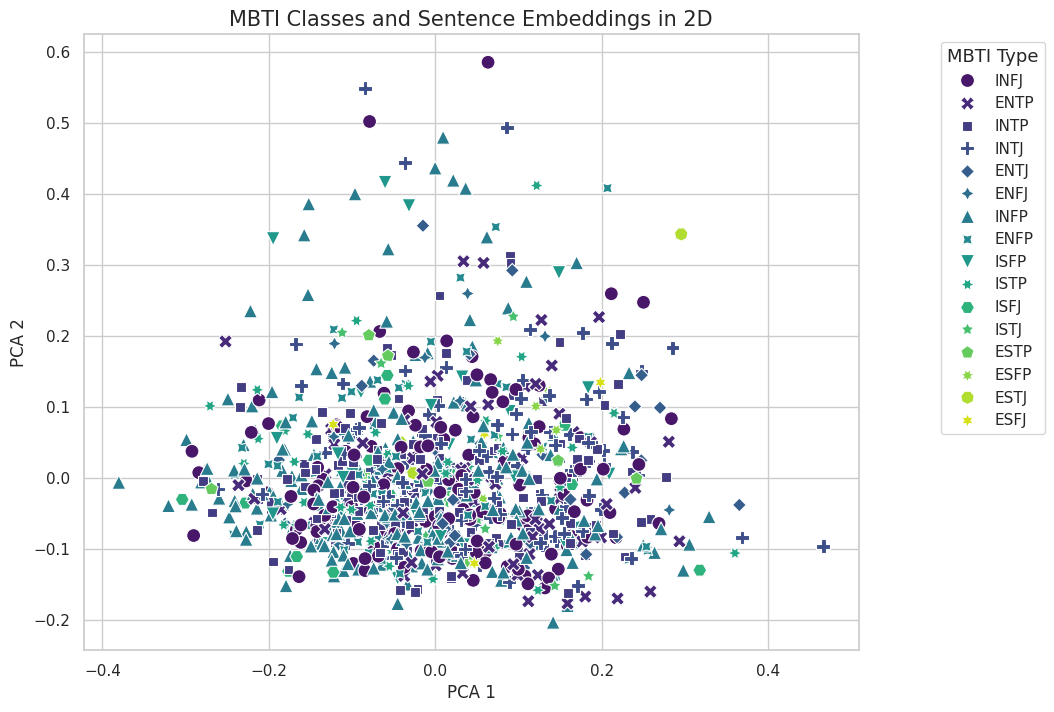

In [110]:
# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='pca_one', y='pca_two', hue='type', data=df, palette='viridis', s=100, style='type', markers=True)

# Adding titles and labels
plt.title('MBTI Classes and Sentence Embeddings in 2D', fontsize=15)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)

# Legend settings
plt.legend(title='MBTI Type', title_fontsize='13', fontsize='11', loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()


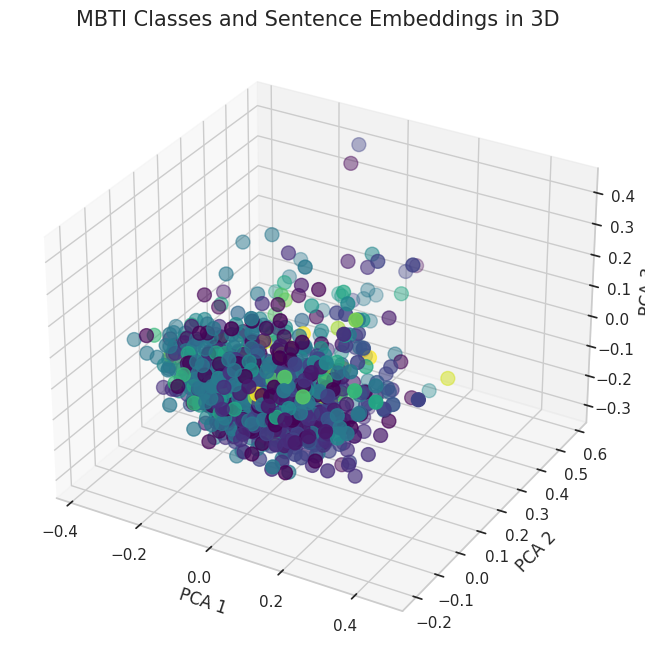

In [111]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['pca_one'], df['pca_two'], df['pca_three'], c=pd.factorize(df['type'])[0], cmap='viridis', s=100)

# Adding titles and labels
ax.set_title('MBTI Classes and Sentence Embeddings in 3D', fontsize=15)
ax.set_xlabel('PCA 1', fontsize=12)
ax.set_ylabel('PCA 2', fontsize=12)
ax.set_zlabel('PCA 3', fontsize=12)

# Legend with MBTI types
# Show the plot
plt.show()


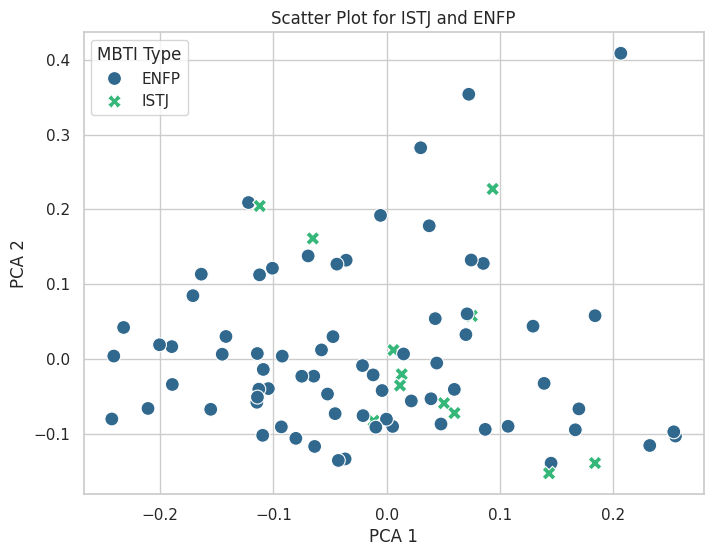

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Example data setup (assuming 'pca_one' and 'pca_two' are your PCA components)
# df = pd.DataFrame({
#     'pca_one': np.random.rand(100),
#     'pca_two': np.random.rand(100),
#     'type': np.random.choice(['INTJ', 'ENTP', 'INFJ', 'ENFJ'], 100)
# })

# Find all unique pairs of MBTI types
types = df['type'].unique()
pairs = list(itertools.combinations(types, 2))  # Use combinations if order doesn't matter, permutations otherwise
pairs = [('ISTJ', 'ENFP')]

# Plotting each pair
for (type1, type2) in pairs:
    subset = df[(df['type'] == type1) | (df['type'] == type2)]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='pca_one', y='pca_two', hue='type', data=subset, style='type', s=100, palette='viridis')
    plt.title(f'Scatter Plot for {type1} and {type2}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='MBTI Type')
    plt.show()


# Part 4:

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [114]:
X = df['posts']
y = df['type']

X.shape, y.shape

((1000,), (1000,))

In [115]:
# Applying CountVectorizer to covert the string doc into the numbers

# vect = CountVectorizer(ngram_range=(1,3), min_df=5, max_features=8000)
# X_vec = vect.fit_transform(X).toarray()
# X_vec[:5]

X_vec = reduced_embeddings
X_vec.shape

(1000, 500)

In [116]:
X_vec.shape

(1000, 500)

In [117]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state = 0, stratify=df.type)

In [118]:
# # Checking the model performance using Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_train, y_train), nb.score(X_test, y_test)

(0.96625, 0.32)

In [119]:
X_train.shape

(800, 500)

In [120]:
# Checking the model performance using SVM


svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_train, y_train), svm.score(X_test, y_test)

(0.92375, 0.465)

In [138]:
# Checking the model performance using kernel SVM

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm.score(X_train, y_train), svm.score(X_test, y_test)


(0.26625, 0.235)

In [121]:
# Checking the model performance using KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.50375, 0.285)

#

In [122]:
y_pred = knn.predict(X_test)
# confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,ENFJ,ENFP,ENTJ,ENTP,INFJ,INFP,INTJ,INTP,ISFP,All
Actual,,,,,,,,,,
ENFJ,0,0,0,0,3,1,0,1,0,5
ENFP,0,2,0,2,2,7,1,0,0,14
ENTJ,0,1,0,1,1,1,1,1,0,6
ENTP,0,2,0,2,2,5,1,3,0,15
ESFJ,0,0,0,1,0,0,0,0,0,1
ESFP,0,0,0,0,1,0,0,0,0,1
ESTJ,0,0,0,0,0,1,0,0,0,1
ESTP,0,0,0,0,0,2,0,0,0,2
INFJ,1,3,1,1,13,10,2,1,0,32


In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are your training and test data
dt = DecisionTreeClassifier(max_depth=3)  # You can choose appropriate hyperparameters
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree model:", accuracy_dt)

Accuracy of Decision Tree model: 0.275


In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are your training and test data
knn = KNeighborsClassifier(n_neighbors=19)  # You can choose appropriate hyperparameters
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN model:", accuracy_knn)

Accuracy of KNN model: 0.35


In [125]:
# Assuming X_train, y_train, X_test, y_test are your training and test data
svm = SVC(kernel='linear')  # You can choose appropriate hyperparameters
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM model:", accuracy_svm)


Accuracy of SVM model: 0.445


In [131]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

/home/hb/anaconda3/envs/mbti/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/hb/anaconda3/envs/mbti/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/hb/anaconda3/envs/mbti/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/hb/anaconda3/envs/mbti/lib/p

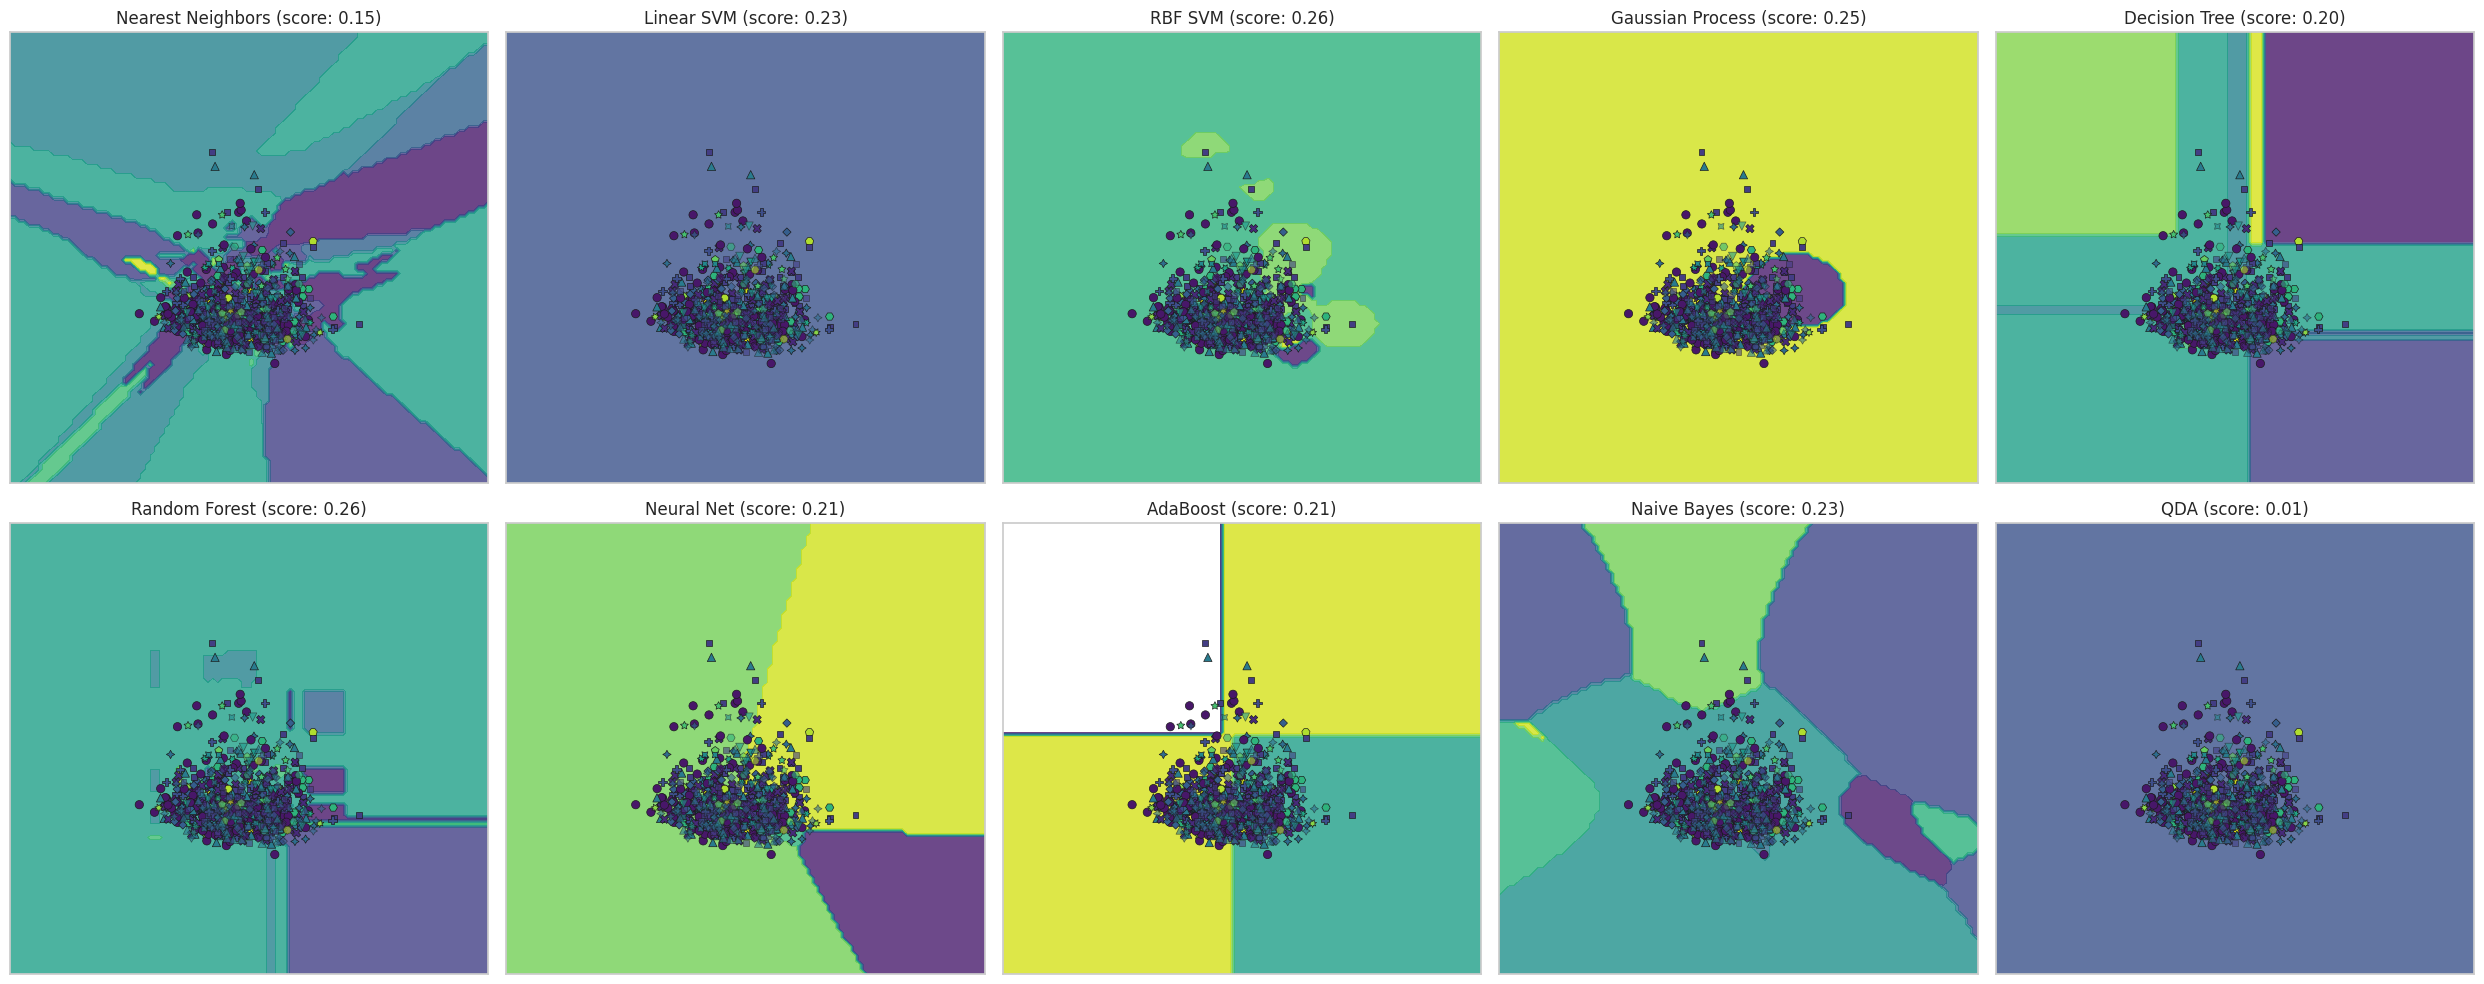

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns  # Import seaborn for styling

# Setting the aesthetic style of the plots
sns.axes_style(style="whitegrid")

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Names of classifiers
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

# Classifier instances
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

for ax, clf, name in zip(axes.flatten(), classifiers, names):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot decision boundaries
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        cmap='viridis',
        alpha=0.8,
        ax=ax,
        eps=0.5
    )

    # Plot training and testing points
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='viridis', style=y_train,
                    #markers=['o', 's'], 
                    ax=ax, edgecolor="k", legend=False)
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='viridis', style=y_test,
                    #markers=['o', 's'], 
                    ax=ax, alpha=0.6, edgecolor="k", legend=False)

    ax.set_title(f'{name} (score: {score:.2f})')
    ax.set_xlim(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5)
    ax.set_ylim(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()